In [1]:
# Create synaptograms from an input json file 

In [2]:
import numpy as np 
from at_synapse_detection import synaptogram
from at_synapse_detection.render_module import RenderModule
import renderapi
import matplotlib.pyplot as plt
from at_synapse_detection import dataAccess as da
from at_synapse_detection import SynapseDetection as syn 
import os
import json 
import pandas as pd 
from at_synapse_detection import evaluate_synapse_detection as esd
from at_synapse_detection.AnnotationJsonSchema import AnnotationFile, NumpyArray
import importlib


In [3]:
data = json.load(open('../data/M247514_Rorb_1/Site3Align2/json_annotations/m247514_Site3Annotation_MN_global_v2.json'))

In [4]:
listOfSynapses = data['area_lists']

In [5]:
synapse = listOfSynapses[0]

In [6]:
synapse['oid']

'559'

In [7]:
win_xy = 4
win_z = 1

In [8]:
bbox = synaptogram.getAnnotationBoundingBox2(synapse)
bbox = synaptogram.transformSynapseCoordinates(bbox)
expandedBox = synaptogram.expandBoundingBox(bbox, win_xy, win_z)

In [74]:
import importlib
importlib.reload(synaptogram)

/Users/anish/Documents/Connectome/SynapseAnalysis/at_synapse_detection/synaptogram.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "/Users/anish/anaconda3/envs/synapse_analysis/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/anish/anaconda3/envs/synapse_analysis/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/anish/anaconda3/envs/synapse_analysis/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/anish/anaconda3/envs/synapse_analysis/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/anish/anaconda3/envs/s

<module 'at_synapse_detection.synaptogram' from '/Users/anish/Documents/Connectome/SynapseAnalysis/at_synapse_detection/synaptogram.py'>

In [10]:
synapseOutlinesDict = synaptogram.getAnnotationOutlines(synapse)
synapseOutlinesDict = synaptogram.transformSynapseOutlinesDict(synapseOutlinesDict)

In [11]:
filepath = '/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/';
stackList = ['results', 'PSD95', 'synapsin', 'VGlut1', 'GluN1', 'GABA', 'Gephyrin']

In [12]:
showProb = True
#filename = 'foo.png'
filename = os.path.join(filepath, '{}.png'.format(synapse['oid']))

In [13]:
img = synaptogram.getSynaptogramFromFile(bbox, win_xy, win_z, stackList, showProb, filepath);

<IPython.core.display.Javascript object>


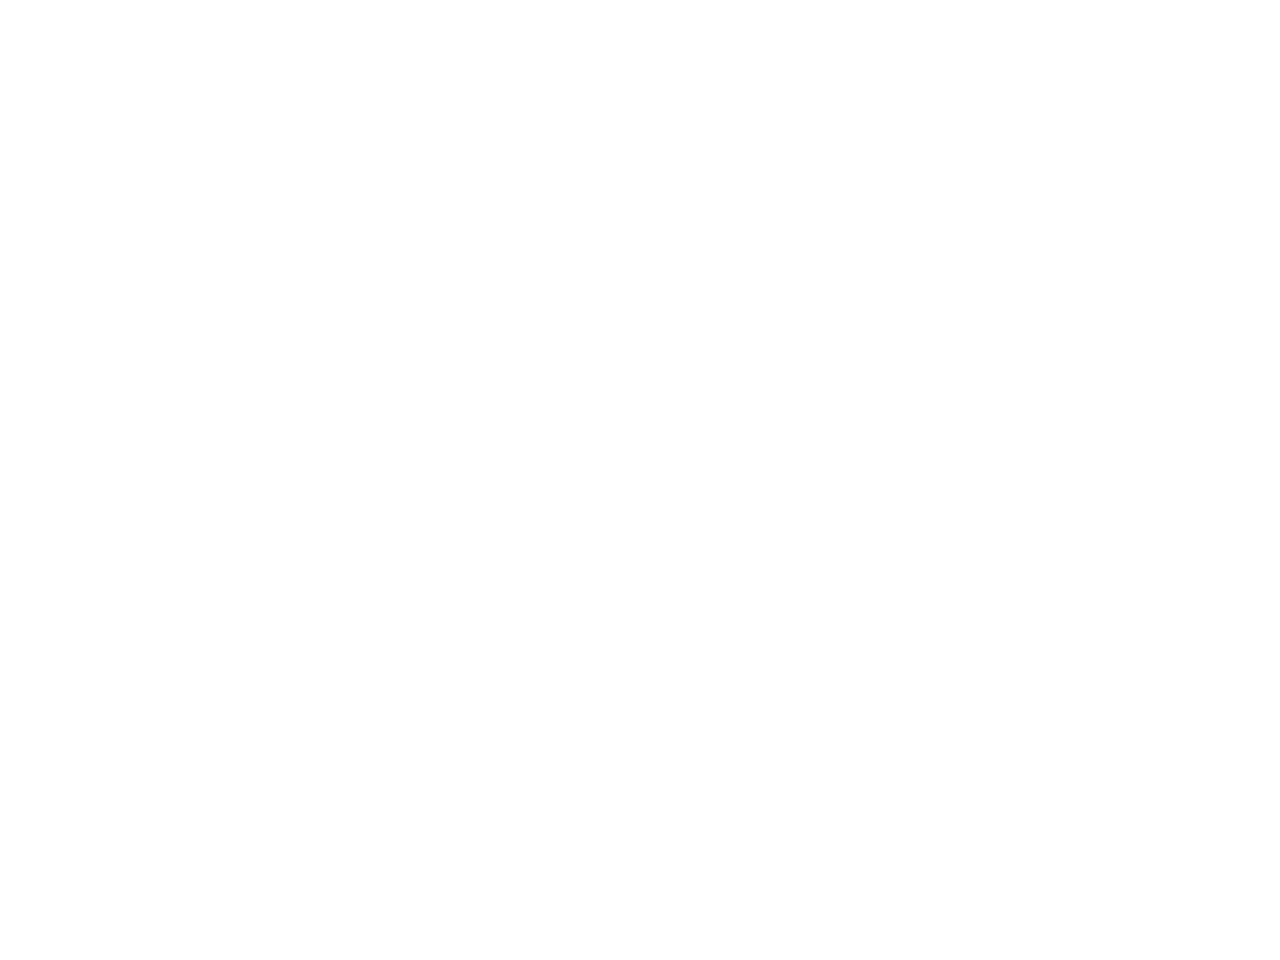

In [14]:
%matplotlib notebook

plt.imshow(img, cmap='gray')
plt.colorbar()

In [15]:
textXOffset = 1
textYOffset = 1

In [16]:
synaptogram.plotOutlinesOnImg(img, synapseOutlinesDict, expandedBox, filename, stackList, 0, 5)
#plotOutlinesOnImg(img, synapseOutlinesDict, expandedBox, filename, stackList, 0, 5)

In [36]:
metadataFN = '../data/M247514_Rorb_1/Site3Align2/site3_metadata.json'
metadata = syn.loadMetadata(metadataFN)

datalocation = metadata['datalocation']
queryFN = metadata['querylocation']

# List of Queries
listOfQueries = syn.loadQueriesJSON(queryFN)


In [17]:
## RUNME 

In [18]:
args = {
    "EM_annotation_json":"../data/M247514_Rorb_1/Site3Align2/json_annotations/m247514_Site3Annotation_MN_global_v2.json",
    "LM_annotation_json":"../data/M247514_Rorb_1/Site3Align2/results/resultVol9.json",
    "EM_metadata_csv":"../data/M247514_Rorb_1/Site3Align2/MNSite3Synaptograms_v2.csv",
    "LM_metadata_file":"../data/M247514_Rorb_1/Site3Align2/site3_metadata.json",
    "EM_inclass_column":"glutsynapse",
    "EM_not_synapse_column":"ConsensusNotSynapse",
    "output_json":"../data/M247514_Rorb_1/Site3Align2/results/Anish_evaluation_output.json"
    }

In [57]:
args['LM_annotation_json'] = "../data/M247514_Rorb_1/Site3Align2/results/resultVol0.json"
missed_annotations, false_positive = evalsyndetections(args)
missedAnnoIds_psd = getMissedAnnoIds(missed_annotations)
len(missedAnnoIds_psd)



EM_per_LM [ 0.84810127  0.12658228  0.02531646]
LM_per_EM [ 0.02009274  0.97217929  0.00772798]
lm edge detections: 5022
em edge annotations 156
LM detections: 5343


13

In [59]:
len(false_positive)/(5343-5022)

0.8348909657320872

{'preIF': ['synapsin'], 'postIF_z': [1], 'preIF_z': [2], 'postIF': ['PSD95']}


In [76]:
print(listOfQueries[3])
args['LM_annotation_json'] = "../data/M247514_Rorb_1/Site3Align2/results/resultVol3.json"
false_negatives, false_positive = evalsyndetections(args)
missedAnnoIds_q7 = getMissedAnnoIds(false_negatives)
len(missedAnnoIds_q7)

{'preIF': ['VGlut1'], 'postIF_z': [], 'preIF_z': [1], 'postIF': []}
EM_per_LM [ 0.21052632  0.59398496  0.19548872]
LM_per_EM [ 0.22411128  0.76970634  0.00618238]
lm edge detections: 4392
em edge annotations 156
LM detections: 4802


145

In [77]:
len(false_positive)

84

In [40]:
print(listOfQueries[8])
args['LM_annotation_json'] = "../data/M247514_Rorb_1/Site3Align2/results/resultVol8.json"
missed_annotations = evalsyndetections(args)
missedAnnoIds_q8 = getMissedAnnoIds(missed_annotations)
len(missedAnnoIds_q8)

{'preIF': ['synapsin'], 'postIF_z': [2], 'preIF_z': [1], 'postIF': ['PSD95']}
EM_per_LM [ 0.27410208  0.62003781  0.10586011]
LM_per_EM [ 0.25347759  0.73879444  0.00772798]
lm edge detections: 5513
em edge annotations 156
LM detections: 6045


164

In [47]:
missed_anno_combined1 = list(set(missedAnnoIds_q7).intersection(missedAnnoIds_q8))
len(missed_anno_combined1)

121

In [41]:
print(listOfQueries[9])
args['LM_annotation_json'] = "../data/M247514_Rorb_1/Site3Align2/results/resultVol9.json"
missed_annotations = evalsyndetections(args)
missedAnnoIds_q9 = getMissedAnnoIds(missed_annotations)
len(missedAnnoIds_q9)

{'preIF': ['VGlut1'], 'postIF_z': [2], 'preIF_z': [1], 'postIF': ['PSD95']}
EM_per_LM [ 0.3609375  0.5578125  0.08125  ]
LM_per_EM [ 0.22102009  0.76661515  0.01236476]
lm edge detections: 7063
em edge annotations 156
LM detections: 7709


143

In [42]:
print(listOfQueries[10])
args['LM_annotation_json'] = "../data/M247514_Rorb_1/Site3Align2/results/resultVol10.json"
missed_annotations = evalsyndetections(args)
missedAnnoIds_q10 = getMissedAnnoIds(missed_annotations)
len(missedAnnoIds_q10)

{'preIF': ['VGlut1'], 'postIF_z': [1], 'preIF_z': [2], 'postIF': ['PSD95']}
EM_per_LM [ 0.45468278  0.45619335  0.08912387]
LM_per_EM [ 0.27202473  0.7202473   0.00772798]
lm edge detections: 7166
em edge annotations 156
LM detections: 7836


176

In [48]:
missed_anno_combined2 = list(set(missedAnnoIds_q9).intersection(missedAnnoIds_q10))
len(missed_anno_combined2)

103

In [49]:
missed_anno_combined = list(set(missed_anno_combined1).intersection(missed_anno_combined2))
len(missed_anno_combined)

78

In [43]:
print(listOfQueries[11])
args['LM_annotation_json'] = "../data/M247514_Rorb_1/Site3Align2/results/resultVol11.json"
missed_annotations = evalsyndetections(args)
missedAnnoIds_q11 = getMissedAnnoIds(missed_annotations)
len(missedAnnoIds_q11)

{'preIF': ['VGlut1'], 'postIF_z': [1], 'preIF_z': [2], 'postIF': ['GluN1']}
EM_per_LM [ 0.7195122   0.23292683  0.04756098]
LM_per_EM [ 0.45131376  0.5316847   0.01700155]
lm edge detections: 9855
em edge annotations 156
LM detections: 10684


292

In [51]:
missed_anno_combined3 = list(set(missed_anno_combined).intersection(missedAnnoIds_q11))
len(missed_anno_combined3)

62

In [44]:
print(listOfQueries[12])
args['LM_annotation_json'] = "../data/M247514_Rorb_1/Site3Align2/results/resultVol12.json"
missed_annotations = evalsyndetections(args)
missedAnnoIds_q12 = getMissedAnnoIds(missed_annotations)
len(missedAnnoIds_q12)

{'preIF': ['synapsin', 'VGlut1'], 'postIF_z': [1], 'preIF_z': [1, 1], 'postIF': ['PSD95']}
EM_per_LM [ 0.17777778  0.71111111  0.11111111]
LM_per_EM [ 0.45904173  0.52395672  0.01700155]
lm edge detections: 3526
em edge annotations 156
LM detections: 3890


297

In [53]:
missed_anno_combined4 = list(set(missed_anno_combined).intersection(missedAnnoIds_q12))
len(missed_anno_combined4)

74

In [ ]:
missed_anno_combined = list(set(missedAnnoIds_q7).intersection(missedAnnoIds_q8))

In [ ]:
missed_anno_combined = list(set(missed_anno_combined).intersection(missedAnnoIds_q9))

missed_anno_combined = list(set(missed_anno_combined).intersection(missedAnnoIds_q10))

missed_anno_combined = list(set(missed_anno_combined).intersection(missedAnnoIds_q11))

missed_anno_combined = list(set(missed_anno_combined).intersection(missedAnnoIds_q12))

In [ ]:
missed_anno = list(set(missed_anno_combined)^set(missedAnnoIds_psd))

In [ ]:
len(missed_anno)

In [20]:
def getMissedAnnoIds(missed_annotations): 
    missedAnnoIds = []
    for anno in missed_annotations: 
        missedAnnoIds.append(anno['oid'])
    
    return missedAnnoIds

In [56]:
def evalsyndetections(args): 
    EM_annotations = esd.load_annotation_file(args['EM_annotation_json'])
    LM_annotations = esd.load_annotation_file(args['LM_annotation_json'])

    df = pd.read_csv(args['EM_metadata_csv'])

    good_rows = (df[args['EM_not_synapse_column']]==False) & (df[args['EM_inclass_column']]==True)        
    good_df=df[good_rows]

    ann_minX=good_df.min().minX
    ann_minY=good_df.min().minY
    ann_maxX=good_df.max().maxX
    ann_maxY=good_df.max().maxY
    ann_minZ=good_df.min().minZ
    ann_maxZ=good_df.max().maxZ
    good_annotations = [al for al in EM_annotations if al['id'] in good_df.index]

    (ann_minX,ann_minY,ann_minZ,ann_maxX,ann_maxY,ann_maxZ) = esd.get_bounding_box_of_annotations(good_annotations)

    LM_edge=esd.get_edge_annotations(LM_annotations,ann_minX,ann_maxX,ann_minY,ann_maxY,ann_minZ,ann_maxZ)

    EM_edge=esd.get_edge_annotations(good_annotations,ann_minX,ann_maxX,ann_minY,ann_maxY,ann_minZ,ann_maxZ)




    LM_index=esd.get_index('LM_index')
    LM_bounds=esd.insert_annotations_into_index(LM_index,LM_annotations)
    EM_index = esd.get_index('EM_index')
    EM_bounds=esd.insert_annotations_into_index(EM_index,good_annotations)

    overlap_matrix = np.zeros((len(good_annotations),len(LM_annotations)),np.bool)
    j=0
    for i,alLM in enumerate(LM_annotations):
        res=EM_index.intersection(LM_bounds[i])
        for k in res:
            alEM=good_annotations[k]
            overlaps,zsection = esd.do_annotations_overlap(alLM,alEM)
            if overlaps:
                overlap_matrix[k,i]=True
    bins = np.arange(0,4)
    LM_per_EM = np.sum(overlap_matrix,axis=1)
    EM_per_LM = np.sum(overlap_matrix,axis=0)
    LM_per_EM_counts,edges = np.histogram(LM_per_EM[EM_edge==False],bins=bins,normed=True)
    EM_per_LM_counts,edges = np.histogram(EM_per_LM[LM_edge==False],bins=bins,normed=True)
    print("EM_per_LM",EM_per_LM_counts)
    print("LM_per_EM",LM_per_EM_counts)
    print('lm edge detections:',np.sum(LM_edge))
    print('em edge annotations',np.sum(EM_edge))
    print('LM detections:',len(LM_edge))
    
    
    missed_annotations = [] 
    for counter, synapse in enumerate(good_annotations): 
        if (LM_per_EM[counter] == 0 and EM_edge[counter]==False): 
            missed_annotations.append(synapse)
            
    false_positives = [] 
    for counter, anno in enumerate(LM_annotations): 
        if (EM_per_LM[counter] == 0 and LM_edge[counter]==False): 
            false_positives.append(anno)
        
    return missed_annotations, false_positives



In [22]:
win_xy = 4
win_z = 1
filepath = '/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/';
stackList = ['results', 'PSD95', 'synapsin', 'VGlut1', 'GluN1', 'GABA', 'Gephyrin']
showProb = True
textXOffset = 0
textYOffset = 5



In [ ]:
# for counter, synapse in enumerate(good_annotations): 
    
#     if (LM_per_EM[counter] > 0 and EM_edge[counter]==False): 
#         bbox = synaptogram.getAnnotationBoundingBox2(synapse)
#         bbox = synaptogram.transformSynapseCoordinates(bbox)
#         expandedBox = synaptogram.expandBoundingBox(bbox, win_xy, win_z)

#         synapseOutlinesDict = synaptogram.getAnnotationOutlines(synapse)
#         synapseOutlinesDict = synaptogram.transformSynapseOutlinesDict(synapseOutlinesDict)

#         filename = os.path.join(filepath, 'synaptograms/good', '{}.png'.format(synapse['oid']))

#         img = synaptogram.getSynaptogramFromFile(bbox, win_xy, win_z, stackList, showProb, filepath);
#         synaptogram.plotOutlinesOnImg(img, synapseOutlinesDict, expandedBox, filename, stackList, textXOffset, textYOffset)
#         print(filename)

In [ ]:
20/(len(good_annotations) - sum(EM_edge))

In [ ]:
for counter, synapse in enumerate(good_annotations): 
    
    if synapse['oid'] in missed_anno: 
        bbox = synaptogram.getAnnotationBoundingBox2(synapse)
        bbox = synaptogram.transformSynapseCoordinates(bbox)
        expandedBox = synaptogram.expandBoundingBox(bbox, win_xy, win_z)

        synapseOutlinesDict = synaptogram.getAnnotationOutlines(synapse)
        synapseOutlinesDict = synaptogram.transformSynapseOutlinesDict(synapseOutlinesDict)

        filename = os.path.join(filepath, 'synaptograms/missed', '{}.png'.format(synapse['oid']))

        img = synaptogram.getSynaptogramFromFile(bbox, win_xy, win_z, stackList, showProb, filepath);
        synaptogram.plotOutlinesOnImg(img, synapseOutlinesDict, expandedBox, filename, stackList, textXOffset, textYOffset)
        print(filename)

In [54]:
#false postives 

In [67]:
false_positive[0]

{'areas': [{'global_path': array([[ 9591.66666667,  5225.        ],
          [ 9591.66666667,  5275.        ],
          [ 9641.66666667,  5275.        ],
          [ 9641.66666667,  5225.        ],
          [ 9591.66666667,  5225.        ]]), 'z': 30.0},
  {'global_path': array([[ 9591.66666667,  5225.        ],
          [ 9591.66666667,  5275.        ],
          [ 9641.66666667,  5275.        ],
          [ 9641.66666667,  5225.        ],
          [ 9591.66666667,  5225.        ]]), 'z': 31.0}],
 'id': 1449,
 'oid': '1449'}

In [78]:
for counter, synapse in enumerate(false_positive): 

    bbox = synaptogram.getAnnotationBoundingBox2(synapse)
    bbox = synaptogram.transformSynapseCoordinates(bbox)
    expandedBox = synaptogram.expandBoundingBox(bbox, win_xy, win_z)

    synapseOutlinesDict = synaptogram.getAnnotationOutlines(synapse)
    synapseOutlinesDict = synaptogram.transformSynapseOutlinesDict(synapseOutlinesDict)

    filename = os.path.join(filepath, 'synaptograms/false_positives', '{}.png'.format(synapse['oid']))

    img = synaptogram.getSynaptogramFromFile(bbox, win_xy, win_z, stackList, showProb, filepath);
    synaptogram.plotOutlinesOnImg(img, synapseOutlinesDict, expandedBox, filename, stackList, textXOffset, textYOffset)
    print(filename)

/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/synaptograms/false_positives/1763.png
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/synaptograms/false_positives/1765.png
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/synaptograms/false_positives/1777.png
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/synaptograms/false_positives/1779.png
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/synaptograms/false_positives/1812.png
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/synaptograms/false_positives/1824.png
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/synaptograms/false_positives/1834.png
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/synaptograms/false_positives/1868.png
/Users/anish/Documents/Connectome/Synapt

/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/synaptograms/false_positives/2805.png
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/synaptograms/false_positives/2830.png
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/synaptograms/false_positives/2844.png
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/synaptograms/false_positives/2873.png
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/synaptograms/false_positives/2923.png
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/synaptograms/false_positives/2924.png
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/synaptograms/false_positives/2925.png
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/synaptograms/false_positives/2936.png
/Users/anish/Documents/Connectome/Synapt